In [3]:
from keras.preprocessing.image import ImageDataGenerator


In [4]:
train_datagen= ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
x_train=train_datagen.flow_from_directory(
    r'/home/sibi-joshva/Documents/Final_deliverable/Final code/Dataset/TRAIN_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse'
)

x_test=test_datagen.flow_from_directory(
    r'/home/sibi-joshva/Documents/Final_deliverable/Final code/Dataset/TRAIN_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse'
)

Found 50 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [6]:
print(x_train.class_indices)

print(x_test.class_indices)

{'APPLE': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}
{'APPLE': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [7]:
from collections import Counter as c
c(x_train .labels)

Counter({0: 10, 1: 10, 2: 10, 3: 10, 4: 10})

In [8]:
import numpy as np


In [9]:
import tensorflow

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [12]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 23s 0us/step


In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [16]:
#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#Fitting the model
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5


2022-11-19 12:39:08.097157: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - ETA: 0s - loss: 1.5119 - accuracy: 0.4478

2022-11-19 12:39:25.825959: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


1563/1563 [==============================] - 18s 11ms/step - loss: 1.5119 - accuracy: 0.4478 - val_loss: 1.2970 - val_accuracy: 0.5473
Epoch 2/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1821 - accuracy: 0.5796 - val_loss: 1.1222 - val_accuracy: 0.6068
Epoch 3/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0302 - accuracy: 0.6379 - val_loss: 1.0108 - val_accuracy: 0.6505
Epoch 4/5
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9227 - accuracy: 0.6771 - val_loss: 0.9277 - val_accuracy: 0.6743
Epoch 5/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8510 - accuracy: 0.7008 - val_loss: 0.8977 - val_accuracy: 0.6872


In [25]:
# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and pooling
classifier.add(Conv2D(32, (3, 3), activation='relu'))

# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

In [26]:
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5, activation='softmax'))
#summary of our model
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [17]:
#Saving our model
model.save('nutrition.h5')

In [45]:
# Compiling the CNN
# categorical_crossentropy for more than 2
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [68]:
#Fitting the model
classifier.fit_generator(generator=x_train,steps_per_epoch = len(x_train),
    epochs=20,validation_data=x_test,validation_steps = len(x_test))


/tmp/ipykernel_18151/191451636.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(generator=x_train,steps_per_epoch = len(x_train),


NameError: name 'scipy' is not defined

In [61]:
classifier.save('nutrition.h5')

In [50]:
#Prediciting our results
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('nutrition.h5')
from tensorflow.keras.utils import img_to_array
#loading of the image
img = image.load_img('/home/sibi-joshva/Documents/Final_deliverable/Final code/Dataset/TEST_SET/APPLE/49_100.jpg',grayscale=False,target_size= (64,64))
#image to array
x = img_to_array(img)
#changing the shape
x = np.expand_dims(x,axis = 0)
predict_x=model.predict(x) 
classes_x=np.argmax(predict_x,axis=-1)
classes_x

1/1 [==============================] - 0s 113ms/step


array([2])

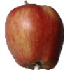

In [21]:
img=image.load_img('/home/sibi-joshva/Documents/Final_deliverable/Final code/Dataset/TEST_SET/APPLE/49_100.jpg',
                   target_size=(70,70))
img

In [22]:
x= image.img_to_array(img)

In [63]:
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

x = np.expand_dims(x, axis=0)

In [65]:
x.ndim

4

In [66]:
pred = classifier.predict(x)

1/1 [==============================] - 0s 76ms/step


In [67]:
pred

array([[1.9972819e-16, 2.9768269e-16, 1.0000000e+00, 5.5895168e-32,
        9.2532284e-36]], dtype=float32)

In [24]:
index=['APPLES', 'BANANA', 'ORANGE', 'PINEAPPLE', 'WATERMELON']
result=str(index[0])
result

'APPLES'